In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob

In [14]:
def extract_number(filename):
    # Extract the first number found in the filename
    match = re.search(r'Training_logs_(\d+)', filename)
    if match:
        number = int(match.group(1))
        return number
    else:
        return None

In [15]:
def getDataFrame(log_file_path):

    # Read the log file
    with open(log_file_path, 'r') as file:
        logs = file.read()

    pattern = r"Epoch (\d+)/\d+\n.*accuracy: ([\d.]+).*val_accuracy: ([\d.]+)"

    # Find all matches
    matches = re.findall(pattern, logs)

    # Create DataFrame
    df = pd.DataFrame(matches, columns=['epoch', 'train_accuracy', 'val_accuracy'])

    # Convert columns to appropriate data types
    df['epoch'] = df['epoch'].astype(int)
    df['train_accuracy'] = df['train_accuracy'].astype(float)
    df['val_accuracy'] = df['val_accuracy'].astype(float)

    # Display the DataFrame
    return df

In [16]:
def plotEpochData(dataframes, titles, figure):
    # dataframes = [df1, df2, df3]
    # titles = [title1, title2, title3]
    fig, axes = plt.subplots(nrows=len(dataframes), ncols=1, figsize=(8, 20))

    # Plot each DataFrame in a separate subplot
    for i, df in enumerate(dataframes):
        axes[i].plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', color='blue', marker='o')
        axes[i].plot(df['epoch'], df['val_accuracy'], label='Val Accuracy', color='orange', marker='x')
        axes[i].set_title(f'Model Accuracy for model with {titles[i]}% corruption')  # Title for each subplot
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Accuracy')
        axes[i].legend(loc='lower right')  # Legend placement
        
        # Optional: Set limits for better visualization
        axes[i].set_ylim(0.75, 1)  # Assuming accuracies are between 0.8 and 1, adjust as needed

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.savefig(figure, bbox_inches='tight')
    plt.show()

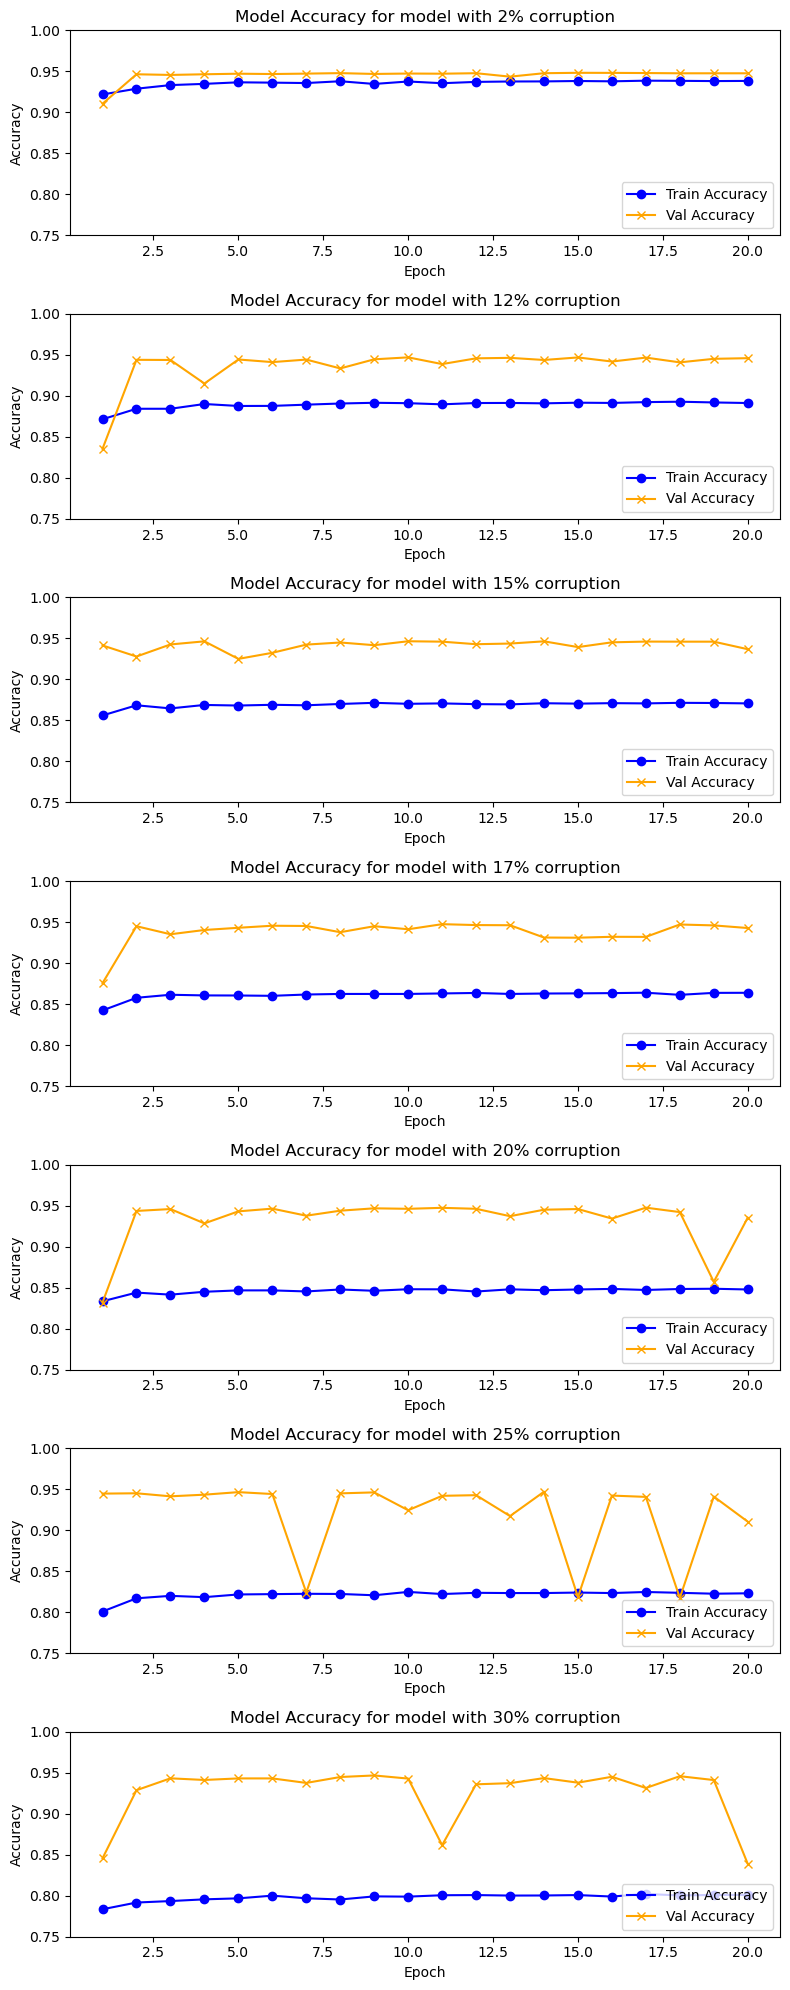

In [17]:
dataframes_names = glob.glob("./Training_Logs/*.txt")
dataframes_names.sort(key=lambda x: int(re.search(r'Training_logs_(\d+)', x).group(1)))
titles = [extract_number(file) for file in dataframes_names]
# print(dataframes_names)
dataframes = [getDataFrame(file) for file in dataframes_names]

# corrupt_2_df = getDataFrame("./Training_Logs/Training_logs_2.txt")
# corrupt_12_df = getDataFrame("./Training_Logs/Training_logs_12.txt")
# large_22_df = getDataFrame("./Training_Logs/Training_logs_20.txt") 

plotEpochData(dataframes, titles, "./Training_Logs/Epoch.png")

In [ ]:
def plotMetrics(df):

    df['Corruption Percentage'] = df['Corruption Percentage'].astype(str)
    x_column = 'Corruption Percentage'
    y_columns = [
        'Average Dice Coefficient', 'Average IoU', 'Average Precision', 
        'Average Recall', 'Average F1 Score', 'Average Specificity', 
        'Overall Average Pixel Accuracy'
    ]

    # Set up the figure and axes for the subplots
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    axes = axes.flatten()

    # Loop over each column to create a subplot
    for i, y_col in enumerate(y_columns):
        ax = axes[i]
        ax.plot(df[x_column], df[y_col], marker='o')  # Plot line with markers for each point
        ax.set_title(y_col)
        ax.set_xlabel(x_column)
        ax.set_ylabel("Value")
        ax.set_xticks(df[x_column])  # Use corruption percentage values as labels
        ax.set_xticklabels(df[x_column])  # Rotate labels for readability

    # Remove the last subplot if there are fewer than 8 (to avoid an empty plot)
    fig.delaxes(axes[-1])

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig('./GRSL_Results/metrics_subplots.png', bbox_inches='tight')
    plt.show()
        

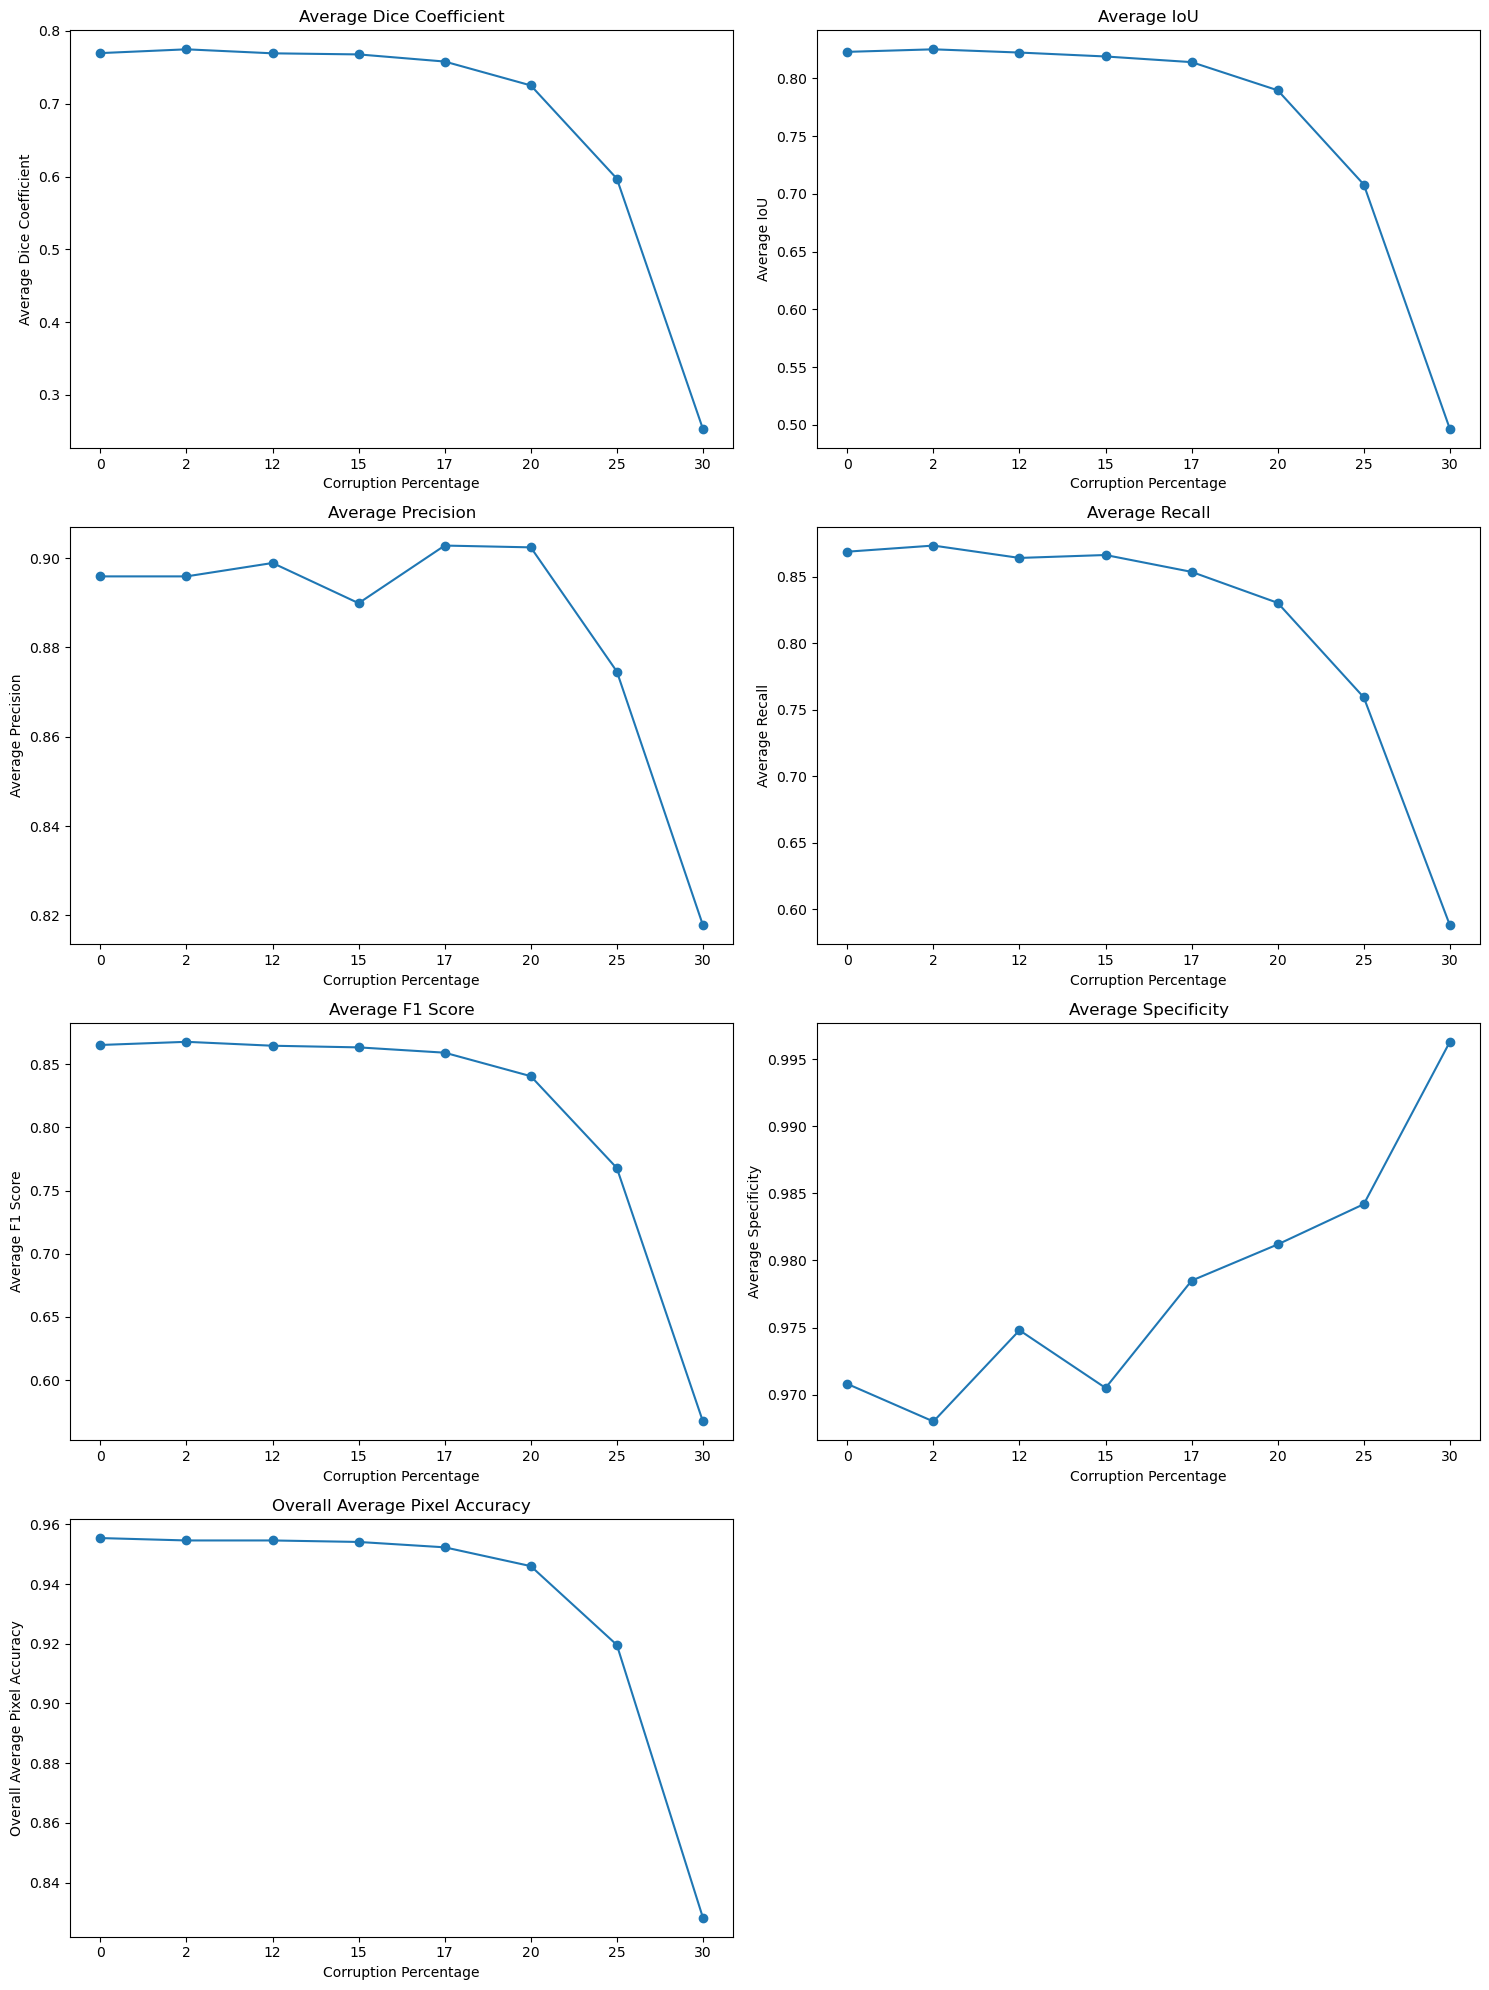

In [19]:
df = pd.read_csv("GRSL_Results\GRSL_Results - Tabular.csv")
plotMetrics(df)